In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')
df_test = pd.read_excel('Test_set.xlsx')

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### total 10683 rows, 11 columns where only Route and Total_stops has a null value

In [5]:
df_train[df_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train = df_train.drop(['Route','Additional_Info'], axis=1)
df_train[['day_of_journey','month_of_journey','year_of_journey']] = df_train['Date_of_Journey'].str.split('/',expand=True)
df_train = df_train.drop('Date_of_Journey',axis=1)


In [7]:
# Unique categories in a column
def uni(feature):
    unique = df_train[feature].unique()
    return unique

cat = ['Airline','Source','Destination','Total_Stops','year_of_journey']

for i in range(len(cat)):
    u = uni(cat[i])
    print(cat[i],':')
    print(len(u))
    print(u)
    

Airline :
12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source :
5
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination :
6
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Total_Stops :
5
['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
year_of_journey :
1
['2019']


In [8]:
df_train = df_train.drop('year_of_journey',axis=1)

df_train[['dep_hr','drop']] = df_train['Dep_Time'].str.split(':',expand=True)
df_train[['Arrival_hr','drop1']] = df_train['Arrival_Time'].str.split(':',expand=True)
df_train[['duration_hr','minute']] = df_train['Duration'].str.split(' ',expand=True)

df_train = df_train.drop(['drop','drop1','Dep_Time','Arrival_Time','Duration'], axis=True)

In [9]:
for i in range(len(df_train)):
    if (df_train['minute'][i] == None):
        df_train['minute'][i] = '00m'

df_train['duration_hr'] = df_train['duration_hr'].str[:-1] 
df_train['duration_min'] = df_train['minute'].str[:-1] 

df_train = df_train.drop('minute',axis=1)

<ipython-input-9-4b1040c3357d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['minute'][i] = '00m'


In [10]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,day_of_journey,month_of_journey,dep_hr,Arrival_hr,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,03,22,01,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,05,05,13,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,06,09,04,19,00
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,05,18,23,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,01,03,16,21,4,45


#### Catplot between airline and price

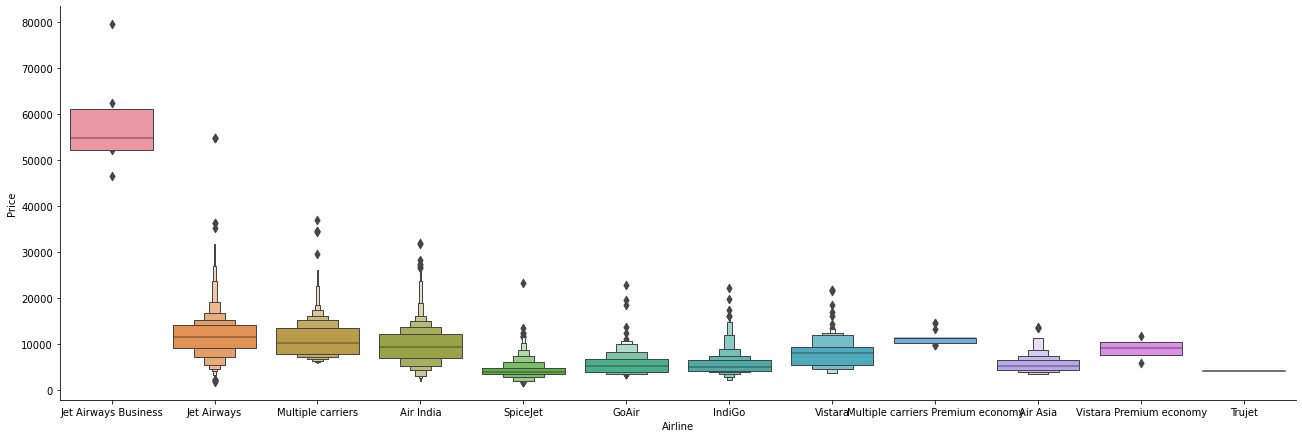

In [11]:
sns.catplot(y='Price',x='Airline',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

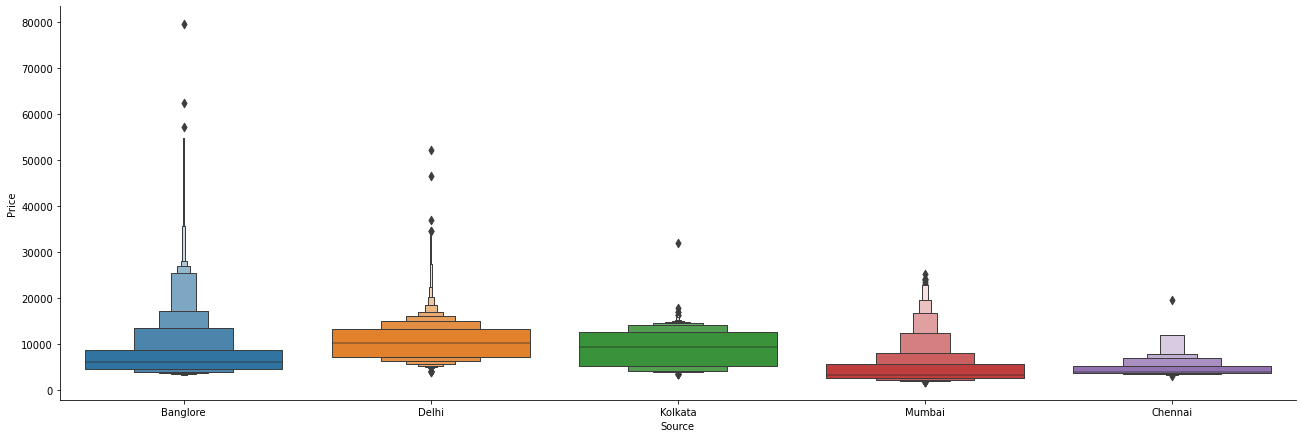

In [12]:
# catplot between source and price

sns.catplot(y="Price",x='Source',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

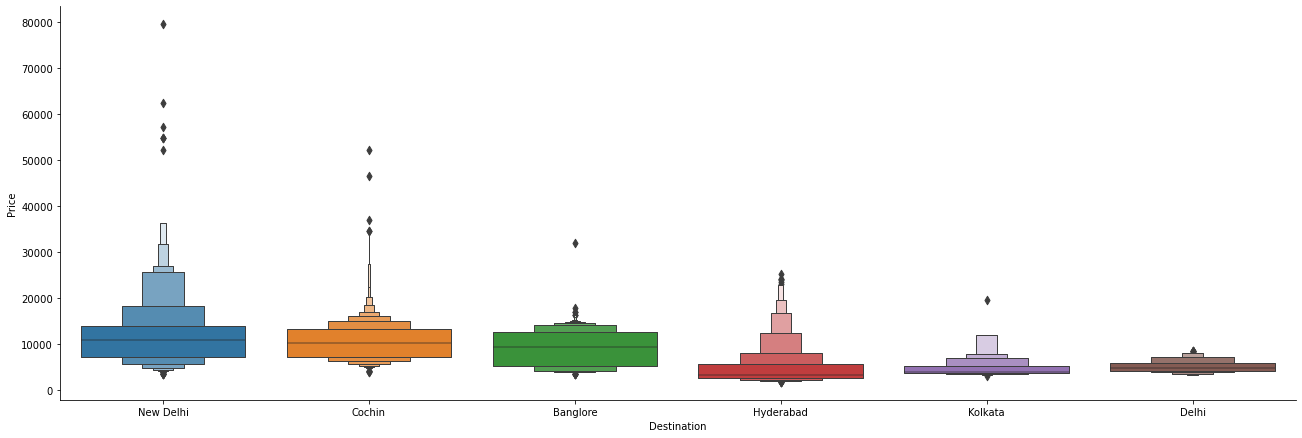

In [13]:
sns.catplot(y='Price',x='Destination',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

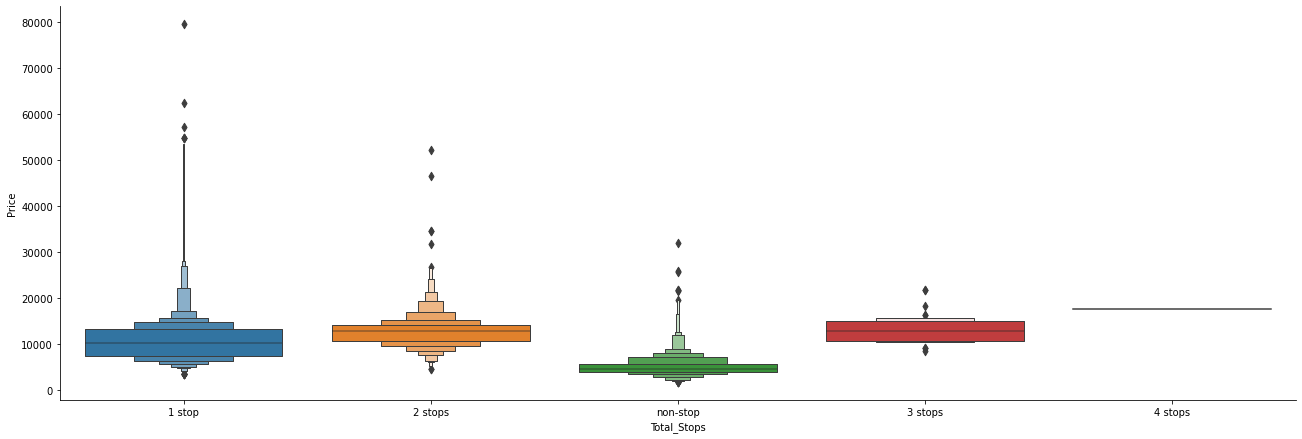

In [14]:
sns.catplot(y='Price',x='Total_Stops',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

### Feature Selection

#### % Missing Values to Amount of variaion to Pairwise correlation to Multi-collinearity to correlation with target to Forward/Backward selection or Tree based selection or lasso based selection or stepwise selecion

#### One Hot Encoding as the categories as not rank based

In [15]:
# One hot Encoding

def enc(feature):
    dummy = pd.get_dummies(df_train[[feature]],drop_first=True)
    return dummy


In [16]:
airline_dummy = enc('Airline')
source_dummy = enc('Source')
destination_dummy = enc('Destination')
total_stops_dummy = enc('Total_Stops')

In [17]:
airline_dummy.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [18]:
df_train_new = pd.concat([df_train,airline_dummy,source_dummy,destination_dummy,total_stops_dummy],axis=1)

In [19]:
df_train_new.head()

,Airline,Source,Destination,Total_Stops,Price,day_of_journey,month_of_journey,dep_hr,Arrival_hr,duration_hr,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,03,22,01,2,...,0,0,0,0,0,1,0,0,0,1
1,Air India,Kolkata,Banglore,2 stops,7662,1,05,05,13,7,...,0,0,0,0,0,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,06,09,04,19,...,0,1,0,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,05,18,23,5,...,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,01,03,16,21,4,...,0,0,0,0,0,1,0,0,0,0


In [20]:
df_train_new = df_train_new.drop(['Airline','Source','Destination','Total_Stops'],axis=1)

In [21]:
df_train_new.head()

,Price,day_of_journey,month_of_journey,dep_hr,Arrival_hr,duration_hr,duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,24,03,22,01,2,50,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,7662,1,05,05,13,7,25,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,13882,9,06,09,04,19,00,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,6218,12,05,18,23,5,25,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,13302,01,03,16,21,4,45,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [22]:
for i in df_train_new.columns:
    df_train_new[i] = df_train_new[i].astype('int')

In [23]:
df_train1 = df_train[['Price','day_of_journey','month_of_journey','dep_hr','Arrival_hr','duration_hr','duration_min']]
for i in df_train1.columns:
    df_train1[i] = df_train1[i].astype('int')

<ipython-input-23-f67e32a4591a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1[i] = df_train1[i].astype('int')


<AxesSubplot:>

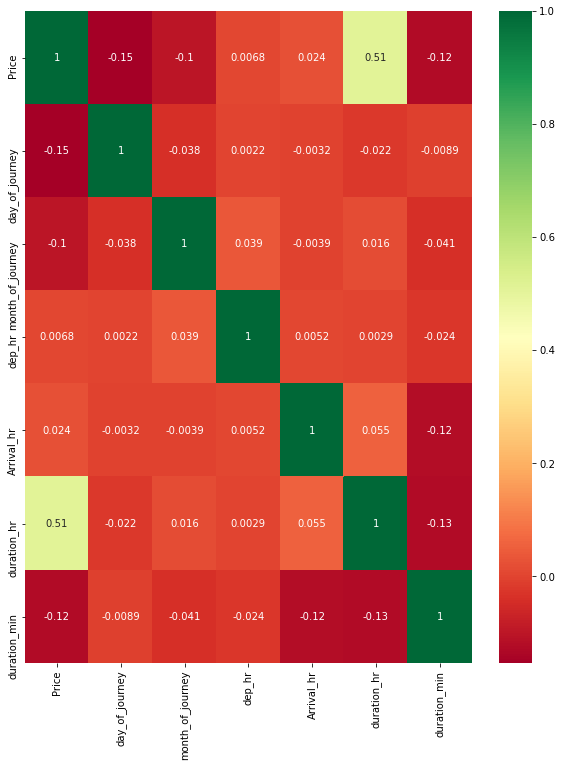

In [24]:
plt.figure(figsize=(10,12))
sns.heatmap(df_train1.corr(), annot=True, cmap='RdYlGn')

In [25]:
# Multicollinearity VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [26]:
X = df_train_new.drop(['Price','Source_Kolkata','month_of_journey','Source_Chennai','Source_Delhi','Source_Mumbai'],axis=1)

vif(X)

,variables,vif
0,day_of_journey,3.501420
1,dep_hr,5.395589
2,Arrival_hr,4.668580
3,duration_hr,6.010798
4,duration_min,3.883071
5,Airline_Air India,4.150712
6,Airline_GoAir,1.286480
7,Airline_IndiGo,3.882759
8,Airline_Jet Airways,6.974022
9,Airline_Jet Airways Business,1.009235


#### Test data set

In [27]:
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)
df_test = df_test.drop(['Route','Additional_Info'], axis=1)
df_test[['day_of_journey','month_of_journey','year_of_journey']] = df_test['Date_of_Journey'].str.split('/',expand=True)
df_test = df_test.drop('Date_of_Journey',axis=1)


In [28]:

df_test = df_test.drop('year_of_journey',axis=1)

df_test[['dep_hr','drop']] = df_test['Dep_Time'].str.split(':',expand=True)
df_test[['Arrival_hr','drop1']] = df_test['Arrival_Time'].str.split(':',expand=True)
df_test[['duration_hr','minute']] = df_test['Duration'].str.split(' ',expand=True)

df_test = df_test.drop(['drop','drop1','Dep_Time','Arrival_Time','Duration'], axis=True)

for i in range(len(df_test)):
    if (df_test['minute'][i] == None):
        df_test['minute'][i] = '00m'

df_test['duration_hr'] = df_test['duration_hr'].str[:-1] 
df_test['duration_min'] = df_test['minute'].str[:-1] 

df_test = df_test.drop('minute',axis=1)

In [29]:
# One hot Encoding test data

def enc(feature):
    dummy = pd.get_dummies(df_test[[feature]],drop_first=True)
    return dummy

airline_test_dummy = enc('Airline')
source_test_dummy = enc('Source')
destination_test_dummy = enc('Destination')
total_stops_test_dummy = enc('Total_Stops')

df_test_new = pd.concat([df_test,airline_test_dummy,source_test_dummy,destination_test_dummy,total_stops_test_dummy],axis=1)
df_test_new = df_test_new.drop(['Airline','Source','Destination','Total_Stops'],axis=1)

for i in df_test_new.columns:
    df_test_new[i] = df_test_new[i].astype('int')

#### Random Forest Regressor

In [30]:
X = df_train_new.drop('Price',axis=1)
y = df_train_new['Price']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
model = RandomForestRegressor()
rf = model.fit(X_train,y_train)

In [31]:
y_pred = model.predict(X_test)

In [32]:
model.score(X_train,y_train)

0.9550824650458449

In [33]:
model.score(X_test,y_test)

0.816335471160743

C:\Users\saina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


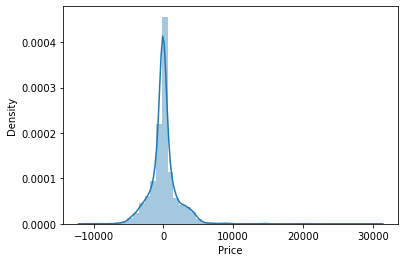

In [34]:
sns.distplot(y_test-y_pred)
plt.show()

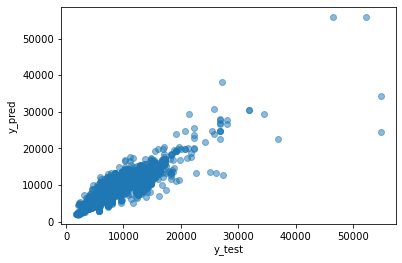

In [35]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

#### Metrics

In [36]:
from sklearn import metrics

print('MSE',metrics.mean_squared_error(y_test,y_pred))

MSE 4143342.096823673


In [37]:
print('R2',metrics.r2_score(y_test,y_pred))

R2 0.816335471160743


In [38]:
print('Adjusted R2', 1 - ((1 - metrics.r2_score(y_test,y_pred)) * (len(X_test) - 1) / (len(X_test) - X_test.shape[1] - 1)))

Adjusted R2 0.814248374242115


#### Hyperparameter Tuning

1. Randomized Search CV
2. Grid Search CV

In [39]:
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


#### Hyper Parameters

Number of trees = n_estimators <br>
Max number of features considered for splitting a node = max_features <br>
Max number of levels in a decision tree = max_depth <br>
Min number of data points placed in a node before node is split = min_samples_split <br>
Min number of data points allowed in a leaf = min_samples_leaf <br>
Method of sampling data points (with or without replacement) = bootstrap

In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to considers at every split
max_features = ['auto','sqrt']
# Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at leaf node
min_samples_leaf = [1,2,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create Random Grid
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}

In [41]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [42]:
# Using the random grid finding best set of hyperparameters
# Create a base model
ran_for = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation
# Search across 100 different hyperparameter sets and use all available cores
rf_randomcv = RandomizedSearchCV(estimator = ran_for, param_distributions = random_grid, n_iter = 10, cv=3,
                             verbose = 2, random_state = 42, n_jobs = -1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [43]:
rf_randomcv.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': True}

In [44]:
prediction = rf_randomcv.predict(X_test)

C:\Users\saina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


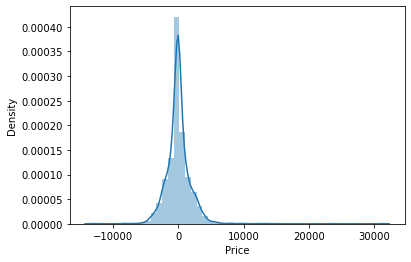

In [45]:
sns.distplot(y_test-prediction)
plt.show()

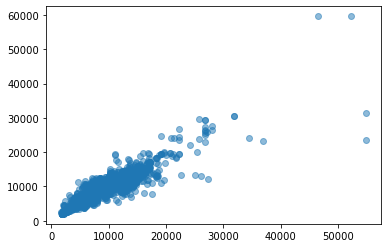

In [46]:
plt.scatter(y_test,prediction,alpha=0.5)

In [47]:
metrics.r2_score(y_test,prediction)

0.8319905500119739

In [48]:
print('Adjusted R2', 1 - ((1 - metrics.r2_score(y_test,prediction)) * (len(X_test) - 1) / (len(X_test) - X_test.shape[1] - 1)))

Adjusted R2 0.8300813517166554
